In [21]:
import pandas as pd
import nltk
import string
import re

### Loading the data set and filtering

In [22]:
df = pd.read_csv("Tweets.csv")
df.shape

(14640, 15)

In [23]:
df = df[["airline_sentiment", "text"]]
df.shape

(14640, 2)

### Preprocessing the data

In [24]:
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
ps = PorterStemmer()
nltk.data.path.append("C:/Users/DASUN SRI NETHMAL/AppData/Roaming/nltk_data")

[nltk_data] Downloading package stopwords to C:\Users\DASUN SRI
[nltk_data]     NETHMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DASUN SRI
[nltk_data]     NETHMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Cleaning the text with stemming method

In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http.?://[^\s]+[\s]?','',text)

    try:
        text = nltk.word_tokenize(text)
    except LookupError:
        text = text.split()
    
    y = []

    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [26]:
df["text_cleaned"] = df["text"].apply(clean_text)

In [27]:
df.head(5)

,airline_sentiment,text,text_cleaned
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plu ad commerci experience... t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica today... must mean need take an...
3,negative,@VirginAmerica it's really aggressive to blast...,"@virginamerica realli aggress blast obnoxi ""en..."
4,negative,@VirginAmerica and it's a really big bad thing...,@virginamerica realli big bad thing


### Features Extraction


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df["text_cleaned"]).toarray()

Y = df["airline_sentiment"].values

### Train the model

In [29]:
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=2
)

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Model one in naive bayes

nb_model = MultinomialNB()
nb_model.fit(X_train,Y_train)
y_pred_nb = nb_model.predict(x_test)

print("Naive Bayes Accuracy :", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy : 0.7219945355191257
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1791
     neutral       0.71      0.28      0.40       648
    positive       0.82      0.37      0.51       489

    accuracy                           0.72      2928
   macro avg       0.75      0.54      0.58      2928
weighted avg       0.73      0.72      0.68      2928



In [31]:
from sklearn.ensemble import RandomForestClassifier

#Model two in random forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(x_test)

print("Random Forest Accuracy :", accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Accuracy : 0.7431693989071039
              precision    recall  f1-score   support

    negative       0.77      0.94      0.85      1791
     neutral       0.63      0.40      0.49       648
    positive       0.72      0.48      0.58       489

    accuracy                           0.74      2928
   macro avg       0.70      0.61      0.64      2928
weighted avg       0.73      0.74      0.72      2928



### Evaluate Results

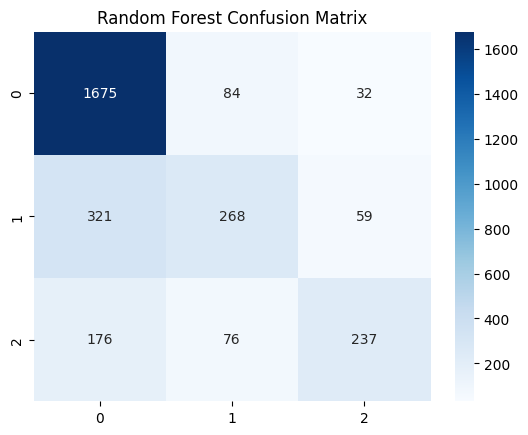

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()